## 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [ ]:
!pip install ipywidgets widgetsnbextension pandas-profiling

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [1]:
# Torch will be used to load the YOLO model and make detections
import torch
# matplotlib will be used for visualising images
from matplotlib import pyplot as plt
# Numpy will be used for array transformation
import numpy as np
# OpenCV helps access the webcam and render feeds
import cv2

 ## 2. Load Model

In [2]:
# downloading the pre-trained ultralytics model from Pytorch hub
# torch hub is like tenserflow but pytorch equivalent
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')

Using cache found in C:\Users\Jimmy/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-11 torch 1.8.2+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
           

## 3. Make Detections with Images

In [4]:
# img = 'https://ultralytics.com/images/zidane.jpg'
# img = 'bao1.jpg'
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKlewM5XH0Wqi6jGo2MnCDIXh9WzXIFSZx0A&usqp=CAU'

In [5]:
results = model(img)
results.print()

image 1/1: 194x259 5 traffic lights
Speed: 3335.7ms pre-process, 105.0ms inference, 9.0ms NMS per image at shape (1, 3, 480, 640)


In [6]:
# tap . and tab to show the components
# xyxy: The output from running results.xyxy is as follows: 
# -xmin, ymin, xmax, ymax, confidence, class
results.xyxy

[tensor([[ 99.03993,  85.43742, 107.14758, 103.55984,   0.88665,   9.00000],
         [ 45.13480,  77.42815,  53.27507,  99.91492,   0.83574,   9.00000],
         [193.07799, 119.59361, 201.01822, 137.69196,   0.76900,   9.00000],
         [122.92117,  88.03745, 134.02548, 103.86404,   0.37839,   9.00000],
         [ 73.47724,  84.64827,  85.21796, 100.05634,   0.25471,   9.00000]])]

In [7]:
results.show()

In [8]:
# return the image with the detections drawn on it
results.render()

[array([[[ 91, 148, 215],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 82, 140, 203],
         [ 82, 140, 203],
         [ 82, 140, 203]],
 
        [[ 91, 148, 215],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 82, 140, 203],
         [ 82, 140, 203],
         [ 82, 140, 203]],
 
        [[ 92, 149, 216],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 83, 141, 204],
         [ 83, 141, 204],
         [ 83, 141, 204]],
 
        ...,
 
        [[126, 108,  86],
         [126, 108,  86],
         [126, 108,  86],
         ...,
         [100,  86,  77],
         [100,  86,  77],
         [100,  86,  77]],
 
        [[127, 109,  87],
         [127, 109,  87],
         [127, 109,  87],
         ...,
         [ 90,  75,  68],
         [ 90,  75,  68],
         [ 90,  75,  68]],
 
        [[127, 109,  87],
         [127, 109,  87],
         [127, 109,  87],
         ...,
         [ 90,  75,  68],
  

In [9]:
np.array(results.render()).shape

(1, 194, 259, 3)

In [10]:
np.squeeze(results.render()).shape

(194, 259, 3)

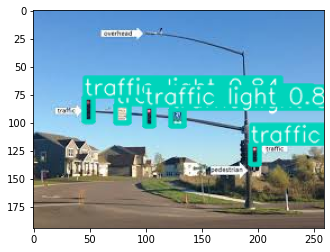

In [11]:
# render
# %matplotlib inline: the matplotlib magic function passed in the inline
# argument to make sure that it displays all matplotlib output in the 
# notebook instead of an external window
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## 4. Real Time Detections

In [12]:
# test video
# cap = cv2.VideoCapture('Space Invaders 2021-11-04 23-10-02.mp4')

# test real camera
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 5. Data processing

In [2]:
import numpy as np
import pandas as pd
import os

In [14]:
ANNOTATIONS_PATH = os.path.join('archive', 'Annotations', 'Annotations')
DATA_PATH = os.path.join('data')

paths = {
    'DAY_TRAIN_PATH' : os.path.join(ANNOTATIONS_PATH, 'dayTrain'),
    'NIGHT_TRAIN_PATH' : os.path.join(ANNOTATIONS_PATH, 'nightTrain'),
    'DAY_IMAGE_PATH' : os.path.join('archive', 'dayTrain', 'dayTrain'),
    'NIGHT_IMAGE_PATH' : os.path.join('archive', 'nightTrain', 'nightTrain'),
    'IMAGES_PATH' : os.path.join(DATA_PATH, 'images'),
    'LABELS_PATH' : os.path.join(DATA_PATH, 'labels')    
}

In [15]:
import shutil

# delete data folder if it exist
try:
    shutil.rmtree(DATA_PATH)
except OSError as e:
    print(("Error: %s : %s " % (DATA_PATH, e.strerror)))

# create data folder
os.mkdir(DATA_PATH)
os.mkdir(paths['IMAGES_PATH'])
os.mkdir(paths['LABELS_PATH'])

classes_path = os.path.join(paths['LABELS_PATH'], 'classes.txt')
with open(classes_path, 'w') as f:   
    f.write('go_light\nstop_light\nstopLeft_light\nwarning_light\ngoLeft_light\nwarningLeft_light') 
    

In [16]:
os.listdir(paths['DAY_TRAIN_PATH'])

['dayClip1',
 'dayClip10',
 'dayClip11',
 'dayClip12',
 'dayClip13',
 'dayClip2',
 'dayClip3',
 'dayClip4',
 'dayClip5',
 'dayClip6',
 'dayClip7',
 'dayClip8',
 'dayClip9']

In [17]:
day_data = []
for file in os.listdir(paths['DAY_TRAIN_PATH']):
    day_df = pd.read_csv(os.path.join(paths['DAY_TRAIN_PATH'], file, 'frameAnnotationsBOX.csv'), sep=';')
    day_data.append(day_df)    
day_data_df = pd.concat(day_data)
day_data_df['isDay'] = 1

night_data = []
for file in os.listdir(paths['NIGHT_TRAIN_PATH']):
    night_df = pd.read_csv(os.path.join(paths['NIGHT_TRAIN_PATH'], file, 'frameAnnotationsBOX.csv'), sep=';')
    night_data.append(night_df)
night_data_df = pd.concat(night_data)
night_data_df['isDay'] = 0

df = pd.concat([day_data_df, night_data_df])

In [18]:
df

Filename Annotation tag  Upper left corner X  \
0         dayTraining/dayClip1--00000.jpg             go                  698   
1         dayTraining/dayClip1--00000.jpg             go                  846   
2         dayTraining/dayClip1--00001.jpg             go                  698   
3         dayTraining/dayClip1--00001.jpg             go                  847   
4         dayTraining/dayClip1--00002.jpg             go                  698   
...                                   ...            ...                  ...   
3231  nightTraining/nightClip5--01450.jpg             go                  937   
3232  nightTraining/nightClip5--01451.jpg             go                  467   
3233  nightTraining/nightClip5--01451.jpg             go                  937   
3234  nightTraining/nightClip5--01452.jpg             go                  460   
3235  nightTraining/nightClip5--01452.jpg             go                  937   

      Upper left corner Y  Lower right corner X  ...  \
0                     333                   710  ...   
1                     391                   858  ...   
2                     337                   710  ...   
3                     390                   859  ...   
4                     331                   710  ...   
...                   ...                   ...  ...   
3231                  221                   976  ...   
3232                   36                   512  ...   
3233                  219                   976  ...   
3234                   33                   506  ...   
3235                  219                   976  ...   

                                            Origin file Origin frame number  \
0     dayTraining/dayClip1/dayClip1Shutter0.000800-G...                   0   
1     dayTraining/dayClip1/dayClip1Shutter0.000800-G...                   0   
2     dayTraining/dayClip1/dayClip1Shutter0.000800-G...                   1   
3     dayTraining/dayClip1/dayClip1Shutter0.000800-G...                   1   
4     dayTraining/dayClip1/dayClip1Shutter0.000800-G...                   2   
...                                                 ...                 ...   
3231                 nightTraining/nightClip5/clip5.mp4                1450   
3232                 nightTraining/nightClip5/clip5.mp4                1451   
3233                 nightTraining/nightClip5/clip5.mp4                1451   
3234                 nightTraining/nightClip5/clip5.mp4                1452   
3235                 nightTraining/nightClip5/clip5.mp4                1452   

                                           Origin track  \
0     dayTraining/dayClip1/dayClip1Shutter0.000800-G...   
1     dayTraining/dayClip1/dayClip1Shutter0.000800-G...   
2     dayTraining/dayClip1/dayClip1Shutter0.000800-G...   
3     dayTraining/dayClip1/dayClip1Shutter0.000800-G...   
4     dayTraining/dayClip1/dayClip1Shutter0.000800-G...   
...                                                 ...   
3231                 nightTraining/nightClip5/clip5.mp4   
3232                 nightTraining/nightClip5/clip5.mp4   
3233                 nightTraining/nightClip5/clip5.mp4   
3234                 nightTraining/nightClip5/clip5.mp4   
3235                 nightTraining/nightClip5/clip5.mp4   

     Origin track frame number  isDay  
0                            0      1  
1                            0      1  
2                            1      1  
3                            1      1  
4                            2      1  
...                        ...    ...  
3231                      1450      0  
3232                      1451      0  
3233                      1451      0  
3234                      1452      0  
3235                      1452      0  

[51826 rows x 11 columns]

In [19]:
# check for duplicate column
np.all(df['Origin file'] == df['Origin track']), np.all(df['Origin frame number'] == df['Origin track frame number'])

(True, True)

In [20]:
# drop duplicate columns and 'Origin file' columns
df = df.drop(columns=['Origin track', 'Origin track frame number', 'Origin file'])
df.head()

Filename Annotation tag  Upper left corner X  \
0  dayTraining/dayClip1--00000.jpg             go                  698   
1  dayTraining/dayClip1--00000.jpg             go                  846   
2  dayTraining/dayClip1--00001.jpg             go                  698   
3  dayTraining/dayClip1--00001.jpg             go                  847   
4  dayTraining/dayClip1--00002.jpg             go                  698   

   Upper left corner Y  Lower right corner X  Lower right corner Y  \
0                  333                   710                   358   
1                  391                   858                   411   
2                  337                   710                   357   
3                  390                   859                   410   
4                  331                   710                   356   

   Origin frame number  isDay  
0                    0      1  
1                    0      1  
2                    1      1  
3                    1      1  
4                    2      1

In [21]:
def simplifyFilename(file):
    splitted = file.split('/')
    simplify = splitted[-1]
    return simplify
df['Filename'] = df['Filename'].apply(simplifyFilename)
df.head()

Filename Annotation tag  Upper left corner X  \
0  dayClip1--00000.jpg             go                  698   
1  dayClip1--00000.jpg             go                  846   
2  dayClip1--00001.jpg             go                  698   
3  dayClip1--00001.jpg             go                  847   
4  dayClip1--00002.jpg             go                  698   

   Upper left corner Y  Lower right corner X  Lower right corner Y  \
0                  333                   710                   358   
1                  391                   858                   411   
2                  337                   710                   357   
3                  390                   859                   410   
4                  331                   710                   356   

   Origin frame number  isDay  
0                    0      1  
1                    0      1  
2                    1      1  
3                    1      1  
4                    2      1

In [22]:
def simplifyFilename(file):
    fileName = file.split('.')[0]
    numberName = fileName.split('--')[1]
    imgNum = int(numberName)
    return imgNum
df['imgNum'] = df['Filename'].apply(simplifyFilename)

In [24]:
# Changing Column Names
df.columns = ['image','annotation','left_x','upper_y','right_x','lower_y','frame','isDay', 'imgNum']
df.head()

image annotation  left_x  upper_y  right_x  lower_y  frame  \
0  dayClip1--00000.jpg         go     698      333      710      358      0   
1  dayClip1--00000.jpg         go     846      391      858      411      0   
2  dayClip1--00001.jpg         go     698      337      710      357      1   
3  dayClip1--00001.jpg         go     847      390      859      410      1   
4  dayClip1--00002.jpg         go     698      331      710      356      2   

   isDay  imgNum  
0      1       0  
1      1       0  
2      1       1  
3      1       1  
4      1       2

In [25]:
df = df.set_index("imgNum")

In [26]:
df

image annotation  left_x  upper_y  right_x  lower_y  \
imgNum                                                                        
0         dayClip1--00000.jpg         go     698      333      710      358   
0         dayClip1--00000.jpg         go     846      391      858      411   
1         dayClip1--00001.jpg         go     698      337      710      357   
1         dayClip1--00001.jpg         go     847      390      859      410   
2         dayClip1--00002.jpg         go     698      331      710      356   
...                       ...        ...     ...      ...      ...      ...   
1450    nightClip5--01450.jpg         go     937      221      976      290   
1451    nightClip5--01451.jpg         go     467       36      512      117   
1451    nightClip5--01451.jpg         go     937      219      976      288   
1452    nightClip5--01452.jpg         go     460       33      506      114   
1452    nightClip5--01452.jpg         go     937      219      976      288   

        frame  isDay  
imgNum                
0           0      1  
0           0      1  
1           1      1  
1           1      1  
2           2      1  
...       ...    ...  
1450     1450      0  
1451     1451      0  
1451     1451      0  
1452     1452      0  
1452     1452      0  

[51826 rows x 8 columns]

In [27]:
# Selects every 10rd image starting from 0
df = df[df.index % 10 == 0]  # Selects every 5rd image starting from 0
df

image annotation  left_x  upper_y  right_x  lower_y  \
imgNum                                                                        
0         dayClip1--00000.jpg         go     698      333      710      358   
0         dayClip1--00000.jpg         go     846      391      858      411   
10        dayClip1--00010.jpg         go     698      331      713      351   
10        dayClip1--00010.jpg         go     862      385      874      410   
20        dayClip1--00020.jpg         go     709      313      724      343   
...                       ...        ...     ...      ...      ...      ...   
1430    nightClip5--01430.jpg         go     905      273      937      327   
1440    nightClip5--01440.jpg         go     516      101      557      170   
1440    nightClip5--01440.jpg         go     923      251      957      314   
1450    nightClip5--01450.jpg         go     472       45      518      120   
1450    nightClip5--01450.jpg         go     937      221      976      290   

        frame  isDay  
imgNum                
0           0      1  
0           0      1  
10         10      1  
10         10      1  
20         20      1  
...       ...    ...  
1430     1430      0  
1440     1440      0  
1440     1440      0  
1450     1450      0  
1450     1450      0  

[5206 rows x 8 columns]

In [28]:
annotations = df['annotation'].unique()
annotations

array(['go', 'stop', 'stopLeft', 'warning', 'goLeft', 'warningLeft'], dtype=object)

In [29]:
print("Number of Unique Images: ",df.image.nunique(),'/',df.shape[0])

Number of Unique Images:  1803 / 5206


In [30]:
# import shutil

# # create labels folder
# for file_name in file_list:
#     # find the labels path
#     if 'day' in file_name:
#         label_path = os.path.join(paths['DAY_TRAIN_PATH'], file_name, 'labels')
#     else:
#         label_path = os.path.join(paths['NIGHT_TRAIN_PATH'], file_name, 'labels')
        
#     # delete the labels folder if it exist
#     try:
#         shutil.rmtree(label_path)
#     except OSError as e:
#         print("Error: %s : %s" % (label_path, e.strerror))
    
#     # create the labels folder
#     os.mkdir(label_path)

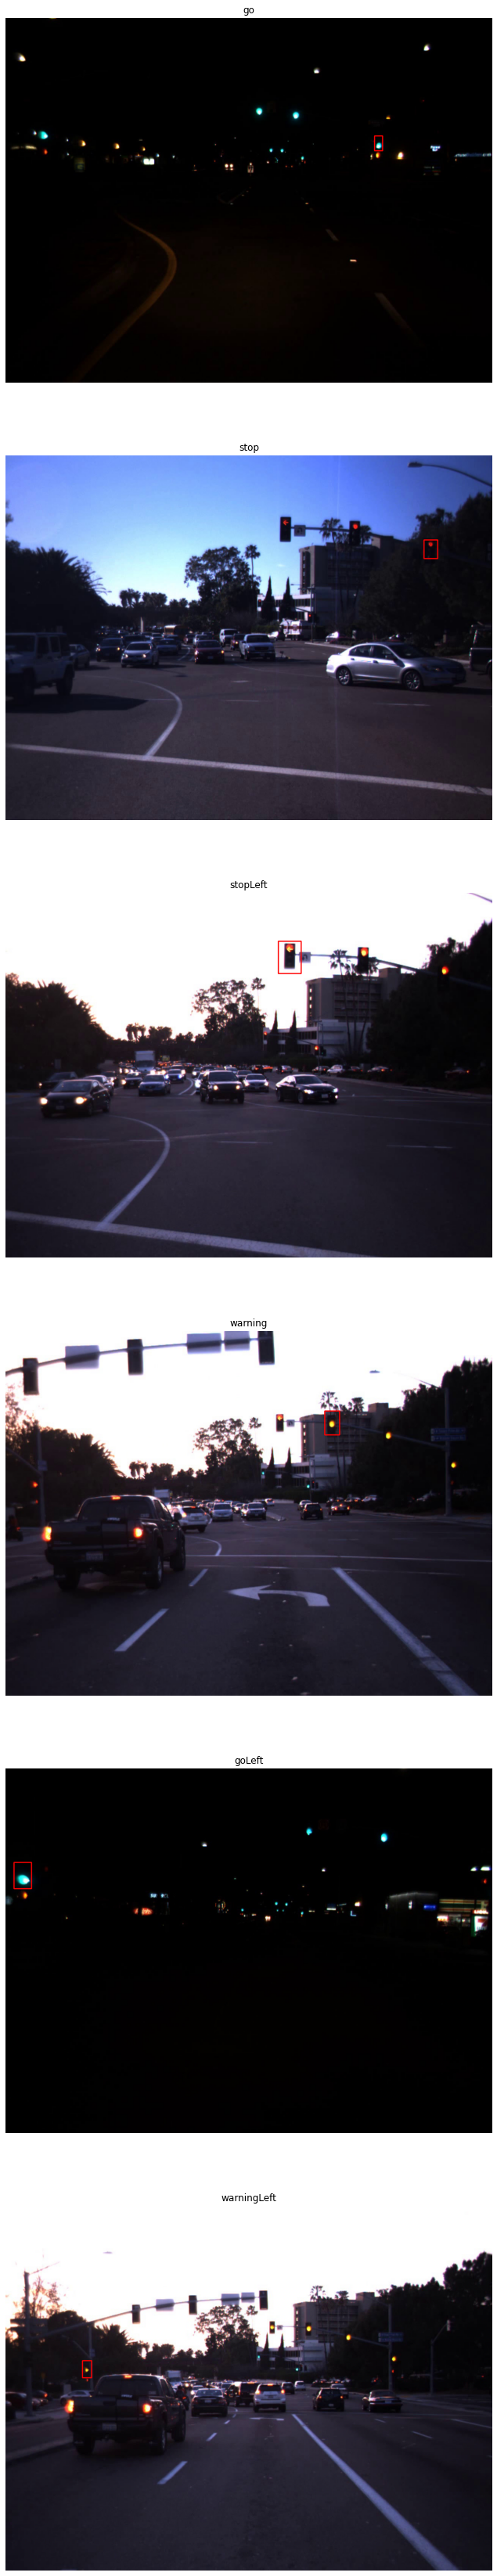

In [31]:
# make len(annotations) numbers of plots
fig, ax = plt.subplots(len(annotations),1,figsize=(15,10*len(annotations)))

# loop through annotations: go, stop...
for i, annotation in enumerate(annotations):
    # pick one sample belong to the annotation in the df
    # DataFrame.sample(n=None, frac=None, replace=False, weights=None, 
    #    random_state=None, axis=None, ignore_index=False)
    # Return a random sample of items from an axis of object.
    sample = df[df['annotation']==annotation].sample(1)
    # convert to numpy array from the sample df 
    sample_arr = sample[['left_x','upper_y','right_x','lower_y']].values[0]
    
    image_name = sample['image'].values[0]
    clipName = image_name.split('--')[0]
    isDay = sample['isDay'].values[0]
    if isDay == 1:        
        path = os.path.join(paths['DAY_IMAGE_PATH'], clipName, 'frames', image_name)
    else:
        path = os.path.join(paths['NIGHT_IMAGE_PATH'], clipName, 'frames', image_name)
    
    image = cv2.imread(path)
    # When the image file is read with the OpenCV function imread(), the order of colors 
    # is BGR (blue, green, red). We need to convert it to be RGB (red, green, blue)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    # Syntax: cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2.rectangle(image,(sample_arr[0],sample_arr[1]),(sample_arr[2],sample_arr[3]),(255, 0, 0), 2)
    
    ax[i].set_title(annotation)
    ax[i].set_axis_off()
    ax[i].imshow(image)



## 6. Data Training

In [32]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [33]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [34]:
def name_image_class(image_annotation):
    if image_annotation == 'go':
        image_class = 0
    elif image_annotation == 'stop':
        image_class = 1
    elif image_annotation == 'stopLeft':
        image_class = 2
    elif image_annotation == 'warning':
        image_class = 3
    elif image_annotation == 'goLeft':
        image_class = 4
    elif image_annotation == 'warningLeft':
        image_class = 5
    return image_class
    

In [35]:
image_width = 1280
image_height = 960
def yolo_box_format(left_x, upper_y, right_x, lower_y):
        x_center = (left_x + right_x) / 2.0 / image_width
        y_center = (upper_y + lower_y) / 2.0 / image_height
        width = (right_x - left_x) * 1.0 / image_width
        height = (lower_y - upper_y) * 1.0 / image_height
        return (x_center, y_center, width, height)

In [36]:
df

image annotation  left_x  upper_y  right_x  lower_y  \
imgNum                                                                        
0         dayClip1--00000.jpg         go     698      333      710      358   
0         dayClip1--00000.jpg         go     846      391      858      411   
10        dayClip1--00010.jpg         go     698      331      713      351   
10        dayClip1--00010.jpg         go     862      385      874      410   
20        dayClip1--00020.jpg         go     709      313      724      343   
...                       ...        ...     ...      ...      ...      ...   
1430    nightClip5--01430.jpg         go     905      273      937      327   
1440    nightClip5--01440.jpg         go     516      101      557      170   
1440    nightClip5--01440.jpg         go     923      251      957      314   
1450    nightClip5--01450.jpg         go     472       45      518      120   
1450    nightClip5--01450.jpg         go     937      221      976      290   

        frame  isDay  
imgNum                
0           0      1  
0           0      1  
10         10      1  
10         10      1  
20         20      1  
...       ...    ...  
1430     1430      0  
1440     1440      0  
1440     1440      0  
1450     1450      0  
1450     1450      0  

[5206 rows x 8 columns]

In [37]:
for index, row in df.iterrows():
    textfile = row['image'].split('.')[0] + '.txt'
    image_name = row['image']
    clipName = image_name.split('--')[0]
    isDay = row['isDay']
#     if isDay == 1:
#         textfile_path = os.path.join(paths['DAY_TRAIN_PATH'], clipName, 'labels', textfile)
#     else:
#         textfile_path = os.path.join(paths['NIGHT_TRAIN_PATH'], clipName, 'labels', textfile)
    textfile_path = os.path.join(paths['LABELS_PATH'], textfile)
    # YOLO Format: the YOLO annotation format represents the following values in order:
    # -class number, -x centre coordinate, -y cetre coordinate, -width, -height
    image_annotation = row['annotation']
    image_class = name_image_class(image_annotation)
    x_center, y_center, width, height = yolo_box_format(row['left_x'], row['upper_y'], row['right_x'], row['lower_y'])
    
    images_path = os.path.join(paths['DAY_IMAGE_PATH'], file, 'frames')
    if isDay == 1:
        images_path = os.path.join(paths['DAY_IMAGE_PATH'], clipName, 'frames', row['image'])
    else:
        images_path = os.path.join(paths['NIGHT_IMAGE_PATH'], clipName, 'frames', row['image'])
        
    image_name_path = os.path.join(paths['IMAGES_PATH'], row['image'])    
    copy_image_from = images_path
    copy_image_to = image_name_path
    shutil.copyfile(copy_image_from, copy_image_to)
    
    with open(textfile_path, 'a') as f:   
        f.write(f'{image_class} {x_center} {y_center} {width} {height}\n')
#         f.write(str(image_class))
#         f.write(' ')
#         f.write(str(x_center))
#         f.write(' ')
#         f.write(str(y_center))
#         f.write(' ')
#         f.write(str(width))
#         f.write(' ')
#         f.write(str(height))
#         f.write('\n')
    

## Training Options
Now, we train the network. We use various flags to set options regarding training.

#### img        : 
Size of image. The image is a square one. The original image is resized while maintaining the aspect ratio. The longer side of the image is resized to this number. The shorter side is padded with grey color.
#### batch: 
The batch size
#### epochs: 
Number of epochs to train for
#### data: 
Data YAML file that contains information about the dataset (path of images, labels)
#### workers: 
Number of CPU workers
#### cfg: 
Model architecture. There are 4 choices available: yolo5s.yaml, yolov5m.yaml, yolov5l.yaml, yolov5x.yaml. The size and complexity of these models increases in the ascending order and you can choose a model which suits the complexity of your object detection task. In case you want to work with a custom architecture, you will have to define a YAML file in the models folder specifying the network architecture.
#### weights: 
Pretrained weights you want to start training from. If you want to train from scratch, use --weights ' '
#### name: 
Various things about training such as train logs. Training weights would be stored in a folder named runs/train/name
#### hyp: 
YAML file that describes hyperparameter choices. For examples of how to define hyperparameters, see data/hyp.scratch.yaml. If unspecified, the file data/hyp.scratch.yaml is used.

In [4]:
# create data_demo for demo presentation
# use dataset_demo.yaml, epochs 5, batch 8
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 5 --data dataset_demo.yaml --weights yolov5n.pt --workers 2

train: weights=yolov5n.pt, cfg=, data=dataset_demo.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 71 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-61-gbc3ed95 torch 1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

       4/4        0G    0.1371   0.01119   0.02351        33       320:  31%|███       | 17/55 [00:13<00:27,  1.38it/s]
       4/4        0G    0.1371   0.01119   0.02351        33       320:  33%|███▎      | 18/55 [00:13<00:26,  1.39it/s]
       4/4        0G     0.137    0.0112   0.02325        29       320:  33%|███▎      | 18/55 [00:14<00:26,  1.39it/s]
       4/4        0G     0.137    0.0112   0.02325        29       320:  35%|███▍      | 19/55 [00:14<00:26,  1.38it/s]
       4/4        0G    0.1369    0.0113   0.02342        36       320:  35%|███▍      | 19/55 [00:14<00:26,  1.38it/s]
       4/4        0G    0.1369    0.0113   0.02342        36       320:  36%|███▋      | 20/55 [00:14<00:25,  1.39it/s]
       4/4        0G    0.1371   0.01134   0.02412        38       320:  36%|███▋      | 20/55 [00:15<00:25,  1.39it/s]
       4/4        0G    0.1371   0.01134   0.02412        38       320:  38%|███▊      | 21/55 [00:15<00:24,  1.36it/s]
       4/4        0G    0.1372   0.01119

In [38]:
# may test some small samples for training to test the correctness
# can use data_simplified file to train the data, which removed the duplicated images
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 10 --data dataset.yaml --weights yolov5n.pt --workers 2

train: weights=yolov5n.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 71 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-61-gbc3ed95 torch 1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

       3/9        0G    0.1092    0.0172   0.01631        59       320:   9%|▉         | 10/113 [00:15<02:27,  1.43s/it]
       3/9        0G    0.1092    0.0172   0.01631        59       320:  10%|▉         | 11/113 [00:15<02:27,  1.45s/it]
       3/9        0G    0.1098   0.01715   0.01674        74       320:  10%|▉         | 11/113 [00:17<02:27,  1.45s/it]
       3/9        0G    0.1098   0.01715   0.01674        74       320:  11%|█         | 12/113 [00:17<02:25,  1.44s/it]
       3/9        0G    0.1102   0.01691   0.01672        65       320:  11%|█         | 12/113 [00:18<02:25,  1.44s/it]
       3/9        0G    0.1102   0.01691   0.01672        65       320:  12%|█▏        | 13/113 [00:18<02:21,  1.41s/it]
       3/9        0G    0.1104   0.01664   0.01644        51       320:  12%|█▏        | 13/113 [00:20<02:21,  1.41s/it]
       3/9        0G    0.1104   0.01664   0.01644        51       320:  12%|█▏        | 14/113 [00:20<02:23,  1.45s/it]
       3/9        0G    0.1104  

In [3]:
# select the simplified dataset to train the model
# use dataset_simplified.yaml, batch 16, epochs 200
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset_simplified.yaml --weights yolov5n.pt --workers 2

train: weights=yolov5n.pt, cfg=, data=dataset_simplified.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 74 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-61-gbc3ed95 torch 1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv

      0/99        0G    0.1629  0.008958    0.0516        53       320:  91%|█████████ | 71/78 [01:55<00:11,  1.58s/it]
      0/99        0G    0.1627  0.008986   0.05146        62       320:  91%|█████████ | 71/78 [01:57<00:11,  1.58s/it]
      0/99        0G    0.1627  0.008986   0.05146        62       320:  92%|█████████▏| 72/78 [01:57<00:09,  1.59s/it]
      0/99        0G    0.1624  0.009026   0.05129        63       320:  92%|█████████▏| 72/78 [01:58<00:09,  1.59s/it]
      0/99        0G    0.1624  0.009026   0.05129        63       320:  94%|█████████▎| 73/78 [01:58<00:08,  1.60s/it]
      0/99        0G    0.1622  0.009055   0.05119        63       320:  94%|█████████▎| 73/78 [02:00<00:08,  1.60s/it]
      0/99        0G    0.1622  0.009055   0.05119        63       320:  95%|█████████▍| 74/78 [02:00<00:06,  1.54s/it]
      0/99        0G    0.1621  0.009028   0.05106        61       320:  95%|█████████▍| 74/78 [02:01<00:06,  1.54s/it]
      0/99        0G    0.1621  0.009028

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   3%|▎         | 1/39 [00:01<00:54,  1.44s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   5%|▌         | 2/39 [00:02<00:53,  1.45s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   8%|▊         | 3/39 [00:04<00:52,  1.46s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  10%|█         | 4/39 [00:05<00:49,  1.42s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  13%|█▎        | 5/39 [00:07<00:48,  1.43s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  15%|█▌        | 6/39 [00:08<00:46,  1.40s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  18%|█▊        | 7/39 [00:09<00:45,  1.42s/it]
               Class     Images     Labels          P  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  82%|████████▏ | 32/39 [00:31<00:06,  1.02it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  85%|████████▍ | 33/39 [00:32<00:05,  1.03it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  87%|████████▋ | 34/39 [00:33<00:04,  1.03it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  90%|████████▉ | 35/39 [00:34<00:03,  1.02it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  92%|█████████▏| 36/39 [00:35<00:02,  1.03it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  95%|█████████▍| 37/39 [00:36<00:01,  1.02it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  97%|█████████▋| 38/39 [00:37<00:00,  1.02it/s]
               Class     Images     Labels      

     53/99        0G   0.06173   0.01505  0.004334        72       320:   6%|▋         | 5/78 [00:08<02:01,  1.66s/it]
     53/99        0G   0.06268    0.0152  0.004356        60       320:   6%|▋         | 5/78 [00:09<02:01,  1.66s/it]
     53/99        0G   0.06268    0.0152  0.004356        60       320:   8%|▊         | 6/78 [00:09<01:59,  1.66s/it]
     53/99        0G   0.06266   0.01436  0.004225        34       320:   8%|▊         | 6/78 [00:11<01:59,  1.66s/it]
     53/99        0G   0.06266   0.01436  0.004225        34       320:   9%|▉         | 7/78 [00:11<01:58,  1.66s/it]
     53/99        0G   0.06219   0.01448  0.004069        61       320:   9%|▉         | 7/78 [00:13<01:58,  1.66s/it]
     53/99        0G   0.06219   0.01448  0.004069        61       320:  10%|█         | 8/78 [00:13<01:55,  1.65s/it]
     53/99        0G    0.0626   0.01452  0.004241        59       320:  10%|█         | 8/78 [00:14<01:55,  1.65s/it]
     53/99        0G    0.0626   0.01452  0.0042

     70/99        0G   0.05512   0.01506  0.004246        64       320:  91%|█████████ | 71/78 [01:56<00:11,  1.65s/it]
     70/99        0G    0.0552   0.01503  0.004259        58       320:  91%|█████████ | 71/78 [01:58<00:11,  1.65s/it]
     70/99        0G    0.0552   0.01503  0.004259        58       320:  92%|█████████▏| 72/78 [01:58<00:09,  1.65s/it]
     70/99        0G   0.05528   0.01501  0.004279        50       320:  92%|█████████▏| 72/78 [02:00<00:09,  1.65s/it]
     70/99        0G   0.05528   0.01501  0.004279        50       320:  94%|█████████▎| 73/78 [02:00<00:08,  1.65s/it]
     70/99        0G   0.05533   0.01498  0.004287        50       320:  94%|█████████▎| 73/78 [02:01<00:08,  1.65s/it]
     70/99        0G   0.05533   0.01498  0.004287        50       320:  95%|█████████▍| 74/78 [02:01<00:06,  1.60s/it]
     70/99        0G   0.05535   0.01498  0.004304        62       320:  95%|█████████▍| 74/78 [02:03<00:06,  1.60s/it]
     70/99        0G   0.05535   0.01498

     90/99        0G   0.05142   0.01523  0.002463        55       320:   1%|▏         | 1/78 [00:03<02:07,  1.65s/it]
     90/99        0G   0.05142   0.01523  0.002463        55       320:   3%|▎         | 2/78 [00:03<02:05,  1.65s/it]
     90/99        0G   0.04848    0.0147  0.002514        58       320:   3%|▎         | 2/78 [00:04<02:05,  1.65s/it]
     90/99        0G   0.04848    0.0147  0.002514        58       320:   4%|▍         | 3/78 [00:04<02:02,  1.63s/it]
     90/99        0G   0.04693   0.01363  0.002501        44       320:   4%|▍         | 3/78 [00:06<02:02,  1.63s/it]
     90/99        0G   0.04693   0.01363  0.002501        44       320:   5%|▌         | 4/78 [00:06<02:01,  1.65s/it]
     90/99        0G   0.04959   0.01402  0.002716        65       320:   5%|▌         | 4/78 [00:08<02:01,  1.65s/it]
     90/99        0G   0.04959   0.01402  0.002716        65       320:   6%|▋         | 5/78 [00:08<01:58,  1.62s/it]
     90/99        0G   0.04972   0.01409  0.0028

in the results.csv file, the columns represent:
-Epoch, -Gpu Memory, -Generalized loU(GloU), -Object Loss, -Classification Loss, -Total Loss, 
-Targets, -Image Size, -Precision, -Recall, -mAP @.5, -mAP@.5:.95, -vALIDATION gloU,
-Validation Object Loss, -Validation Class Loss

## 7. Load Custom Model

In [5]:
# exp19, exp20, exp21 are all successful
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp19/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Jimmy/.cache\torch\hub\master.zip
YOLOv5  2022-4-15 torch 1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 1767283 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


In [ ]:

# model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp19/weights/best.pt', force_reload=True)

In [6]:
img = os.path.join('archive', 'sample-dayClip6', 'sample-dayClip6', 'frames', 'dayClip6--00050.jpg')

In [7]:
results = model(img)

In [8]:
results.print()

image 1/1: 960x1280 3 stop_lights, 1 stopLeft_light
Speed: 29.0ms pre-process, 93.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


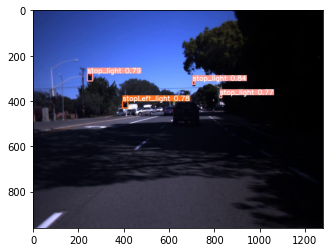

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()